In [21]:
# Importar librerias standard de Qiskit
from qiskit import *
from qiskit.quantum_info import Operator
from qiskit.circuit.library import *
from qiskit.visualization import *
from qiskit_ibm_runtime import *
from qiskit_aer import *

import numpy as np

service = QiskitRuntimeService(channel="local")

In [66]:
def ket(i):
    if i==0:
        return(np.matrix([[1],[0]]))
    else:
        return(np.matrix([[0],[1]]))
def bra(i):
    return(ket(i).H)
    
def Oracle(f):
    unitary = np.matrix([[0 for i in range(4)] for j in range(4)])

    I = np.matrix([[1,0],
                   [0,1]])
    X = np.matrix([[0,1],
                   [1,0]])
    
    for b in range(2):
        if f(b)==0:
            unitary += np.kron(I, ket(b) @ bra(b))
        else:
            unitary += np.kron(X, ket(b) @ bra(b))
    return(UnitaryGate(unitary,label='U_f'))

In [67]:
def balanced(x):
    if x==0:
        return(1)
    else:
        return(0)

def constant(x):
    return(0)

In [68]:
def Deutsch_circuit(function):
    x = QuantumRegister(1,'x')
    y = QuantumRegister(1,'y')
    measure_bit = ClassicalRegister(1,'measure')
    
    qc = QuantumCircuit(x,y,measure_bit)

    qc.append(XGate(), y)
    qc.append(HGate(), x)
    qc.append(HGate(), y)

    qc.barrier()
    
    qc.append(Oracle(function), [x, y])

    qc.barrier()
    
    qc.append(HGate(), x)

    qc.measure(y, measure_bit)
    qc.measure(x, measure_bit)
    return(qc)
    

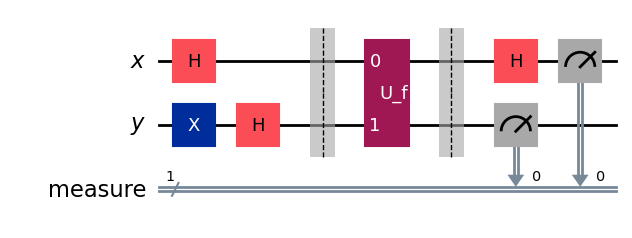

In [69]:
qc = Deutsch_circuit(balanced);

qc.draw('mpl')

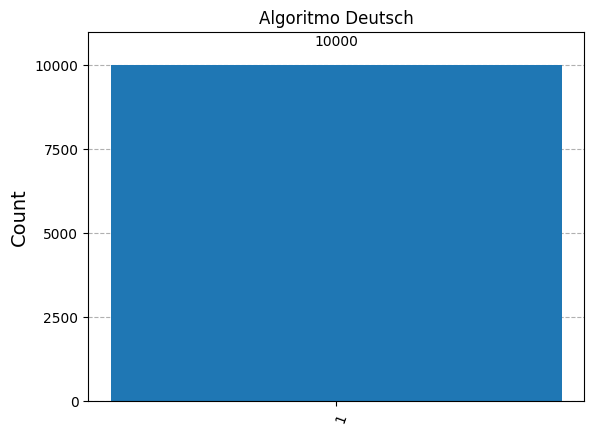

In [70]:
# Transpile for simulator
simulator = AerSimulator()
circuit = transpile(qc, simulator)

# Run and get counts
SHOTS = 10000
result = simulator.run(circuit,shots=SHOTS).result()
counts = result.get_counts()
plot_histogram(counts, title='Algoritmo Deutsch')